<a href="https://colab.research.google.com/github/TanyaAgrwal/Machine-learning/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
class_division=df.value_counts(df['Class'])
class_division

Class
0    284315
1       492
dtype: int64

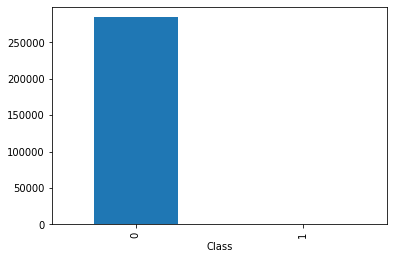

In [ ]:
class_division.plot(kind='bar')
plt.show()

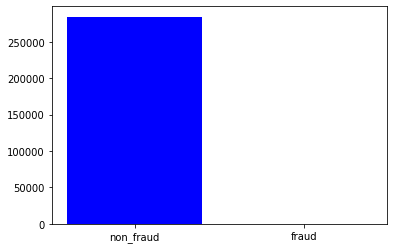

In [ ]:
plt.bar(['non_fraud','fraud'], class_division, color=['blue','red'])
plt.show()

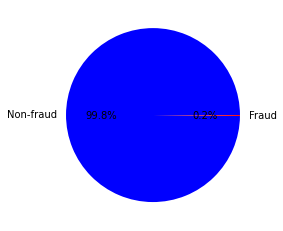

In [ ]:
plt.pie(class_division, labels=['Non-fraud','Fraud'],colors=['blue','red'], autopct='%1.1f%%')
plt.show()

In [ ]:
fraud=df[df['Class']==1]
non_fraud=df[df['Class']==0]
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [ ]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [ ]:
# practice

In [ ]:
a=[1,2,3,4,5,6,7]
import random
random.sample(a,5)

[5, 2, 7, 1, 6]

In [ ]:
import numpy as np
a=(1,3,4,7)
random.choices(a,k=5)

[3, 7, 3, 3, 3]

In [ ]:
#if a has 5 values then sample cannot give more than 5 random values in ans where if a has 5 values the choices 
#can give more than 5 random values.

#we can use sample when we want random values without duplicates and use choices when we want values including duplicates/repeated.

# there are two sample, one is in random library that can take only list, tuple, string, set and sample is also used in pandas
#library to generate sample of random rows or columns(axis=0 for rows, axis=1 for columns, default set to axis=0).

In [ ]:
import pandas as pd
x=np.array([[1,2,3],[4,5,6],[7,8,9],[5,4,7]])
y=pd.DataFrame(x)
y

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
3,5,4,7


In [ ]:
type(y)

pandas.core.frame.DataFrame

In [ ]:
y.sample(2, axis=0)

,0,1,2
1,4,5,6
2,7,8,9


In [ ]:
# practice over

In [ ]:
data=fraud.append(non_fraud)
data.shape

(984, 31)

In [ ]:
# or data2=np.concatenate((fraud, non_fraud), axis=0)
#data2.shape

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238873,149861.0,-1.551925,-0.741955,1.495401,-0.716769,1.558692,0.144521,0.360075,-0.331360,0.525135,-0.143569,0.496865,0.550210,0.285138,-0.535942,-0.044427,0.465649,-1.305734,0.438005,0.554629,-0.424411,-0.498586,-0.763939,-0.697441,0.113303,0.401758,-0.601406,-0.275745,-0.625594,131.00,0
213277,139187.0,-0.346870,1.071201,-1.206566,-1.394077,1.635616,-0.754795,1.592077,-0.247797,-0.481666,-0.018801,0.365367,0.501658,0.014940,0.752730,-0.800941,-0.312103,-0.894811,0.278591,0.335055,0.145955,0.232886,0.877468,-0.248395,0.250901,-0.178732,0.071731,0.490970,0.342441,26.48,0
239697,150222.0,0.667207,0.496259,-2.759751,0.957676,1.188119,0.051884,0.137175,-2.899634,-0.804693,-0.059441,-0.231351,-0.320847,-2.472827,2.052714,-0.827066,-0.491131,-0.309656,0.591423,0.280586,0.609395,-0.717243,1.699760,-0.147243,0.135910,-0.251617,-0.347770,0.263635,0.458193,150.24,0
105416,69510.0,1.049877,-0.044082,1.037692,0.921526,-0.429641,0.711064,-0.667483,0.432871,0.218634,0.040098,1.687070,0.910456,-0.314160,0.365830,1.208205,0.180339,-0.320223,-0.184487,-1.000710,-0.185665,0.124741,0.394980,0.074875,-0.305788,0.141395,-0.406513,0.082160,0.021977,10.68,0


In [ ]:
new_division=pd.value_counts(data['Class'])
new_division

1    492
0    492
Name: Class, dtype: int64

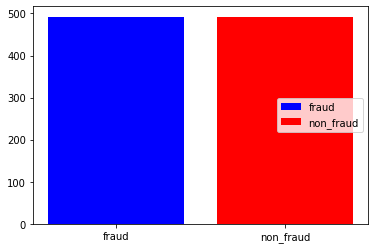

In [ ]:
bb=plt.bar(['fraud','non_fraud'], new_division, color=['blue','red'])
plt.legend(iter(bb), ('fraud','non_fraud'),loc=5)
plt.show()

In [ ]:
x=data.drop(['Class'], axis=1)
y=data['Class'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.1, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((885, 30), (99, 30))

In [ ]:
pd.value_counts(y_test)

0    50
1    49
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sx=StandardScaler()
X_train=sx.fit_transform(X_train)
X_test=sx.transform(X_test)

In [ ]:
X_train.shape

(787, 30)

In [ ]:
X_train.ndim

2

In [ ]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [ ]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [ ]:
X_train[0].shape

(30, 1)

In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Conv1D,BatchNormalization, Dropout
model=Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 128)           1

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train, batch_size=5,epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
177/177 [==============================] - 3s 10ms/step - loss: 0.4805 - accuracy: 0.8206 - val_loss: 0.3617 - val_accuracy: 0.8081
Epoch 2/5
177/177 [==============================] - 1s 8ms/step - loss: 0.2969 - accuracy: 0.9059 - val_loss: 0.1863 - val_accuracy: 0.9293
Epoch 3/5
177/177 [==============================] - 1s 8ms/step - loss: 0.3298 - accuracy: 0.8702 - val_loss: 0.1710 - val_accuracy: 0.9495
Epoch 4/5
177/177 [==============================] - 1s 8ms/step - loss: 0.2961 - accuracy: 0.8980 - val_loss: 0.2051 - val_accuracy: 0.9192
Epoch 5/5
177/177 [==============================] - 1s 8ms/step - loss: 0.2837 - accuracy: 0.9146 - val_loss: 0.1864 - val_accuracy: 0.9495


In [ ]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(test_loss)
print(test_accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.1801 - accuracy: 0.9394
0.1801358014345169
0.939393937587738


In [ ]:
model.save('modelcc')

INFO:tensorflow:Assets written to: modelcc/assets


In [ ]:
from keras.models import load_model
 
# load model
model = load_model('modelcc')
score = model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1864 - accuracy: 0.9495


In [ ]:
import joblib

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving saved_model.sav.txt to saved_model.sav.txt
User uploaded file "saved_model.sav.txt" with length 494647 bytes


In [ ]:

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test datafrom keras.models import model_from_json
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test,y_test)
print(score)

Saved model to disk
Loaded model from disk
4/4 [==============================] - 0s 5ms/step - loss: 0.1664 - accuracy: 0.9383
[0.1801358014345169, 0.939393937587738]


In [ ]:
history.history

{'accuracy': [0.878017783164978,
  0.9237611293792725,
  0.9301143288612366,
  0.9339262843132019,
  0.9351969361305237],
 'loss': [0.3657599091529846,
  0.25703710317611694,
  0.21299968659877777,
  0.18186552822589874,
  0.16658999025821686],
 'val_accuracy': [0.9492385983467102,
  0.4974619150161743,
  0.4974619150161743,
  0.4974619150161743,
  0.4974619150161743],
 'val_loss': [0.568540096282959,
  0.6340453624725342,
  0.7570237517356873,
  0.8570763468742371,
  0.7947778701782227]}

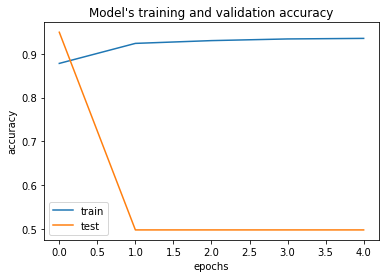

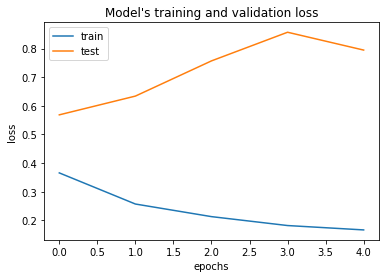

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's training and validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's training and validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()